# 🏦 Sprint 10 — Predicción de Churn en Beta Bank

**Objetivo del proyecto:**  
Construir un modelo de Machine Learning para predecir la salida de clientes (**churn**) en **Beta Bank**, optimizando la métrica **F1 ≥ 0.59** y comparando con **AUC-ROC**.

**Dataset utilizado:** `/datasets/Churn.csv`

**Flujo de trabajo:**  
EDA → Preprocesamiento → Partición de datos → Modelos base → Corrección de desbalance → Selección del mejor modelo → Evaluación en test → Conclusiones


In [1]:
# --- Configuración general ---
import sys, warnings
warnings.filterwarnings("ignore")  # Oculta warnings para un output más limpio en el notebook

# --- Librerías base de datos y números ---
import numpy as np
import pandas as pd

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning (scikit-learn) ---
import sklearn
from sklearn import __version__ as skl_version

# --- Verificación de versiones (sanity check) ---
print(f"Python:        {sys.version.split()[0]}")
print(f"Pandas:        {pd.__version__}")
print(f"Numpy:         {np.__version__}")
print(f"Scikit-learn:  {skl_version}")
print(f"Matplotlib:    {plt.matplotlib.__version__}")
print(f"Seaborn:       {sns.__version__}")

# --- Estilo global de gráficos ---
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11


Python:        3.12.11
Pandas:        2.3.2
Numpy:         2.3.2
Scikit-learn:  1.7.1
Matplotlib:    3.10.5
Seaborn:       0.13.2


### ✅ Conclusión Sección 0 — Encabezado y Configuración
El entorno de trabajo se configuró correctamente y todas las librerías principales se cargaron sin errores. Las versiones instaladas son modernas y compatibles, lo que asegura una base sólida para el análisis de datos, el preprocesamiento, la visualización y el modelado que se desarrollará en este proyecto.

## 1 Carga del dataset y vista rápida

En esta sección se carga el dataset proporcionado por Beta Bank y se realiza una primera exploración general.  
El objetivo es revisar la estructura de los datos, la cantidad de registros disponibles y los tipos de variables que contiene.  
De esta forma se obtiene una visión preliminar del conjunto de información con el que se trabajará.

In [2]:
# Carga del dataset principal
df = pd.read_csv("../datasets/Churn.csv")

# Revisión general de la estructura del dataset
print("Dimensiones del dataset (filas, columnas):", df.shape)
print("\nPrimeras 5 filas:")
display(df.head())

print("\nInformación general del dataset:")
print(df.info())

Dimensiones del dataset (filas, columnas): (10000, 14)

Primeras 5 filas:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


### ✅ Conclusión Sección 1 — Carga del dataset y vista rápida
El dataset proporcionado por Beta Bank contiene **10,000 registros** y **14 columnas**.  
La información incluye variables demográficas (`Age`, `Gender`, `Geography`), financieras (`CreditScore`, `Balance`, `EstimatedSalary`), de comportamiento (`NumOfProducts`, `HasCrCard`, `IsActiveMember`, `Tenure`) y la variable objetivo (`Exited`).  
No se identificaron valores nulos en ninguna de las columnas, lo que garantiza una base de datos completa y lista para el análisis.

## 2 Calidad de datos y estadística descriptiva

En esta sección se evalúa la calidad del dataset con el fin de identificar posibles problemas que puedan afectar el análisis y modelado.  
Se revisa la existencia de registros duplicados, valores nulos y se calculan estadísticas descriptivas para las variables numéricas.  
Esto permite obtener una visión inicial de los rangos, promedios y posibles valores atípicos presentes en los datos.

In [3]:
# --- Revisión de duplicados ---
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

# --- Revisión de valores nulos ---
nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(nulos)

# --- Estadísticas descriptivas de variables numéricas ---
print("\nEstadísticas descriptivas:")
display(df.describe())

Número de registros duplicados: 0

Valores nulos por columna:
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Estadísticas descriptivas:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### ✅ Conclusión Sección 2 — Calidad de datos y estadística descriptiva
La base de datos no presenta registros duplicados ni valores nulos en la mayoría de sus columnas, lo que indica un nivel adecuado de calidad.  
La única excepción es la variable **Tenure**, con 909 valores faltantes, que deberán considerarse en el preprocesamiento.  

En cuanto a las variables numéricas:  
- El **puntaje de crédito** oscila entre 350 y 850, con media cercana a 651.  
- La **edad** varía entre 18 y 92 años, con promedio de 39.  
- El **saldo** de cuenta presenta valores desde 0 hasta aproximadamente 250,898 unidades monetarias.  
- El **salario estimado** se distribuye de forma uniforme entre 11,580 y 199,992.  

En general, los rangos y distribuciones son coherentes con datos de clientes bancarios, aunque existen posibles valores extremos en edad, balance y salario que se explorarán más adelante en el análisis exploratorio.

### 2.2 Tratamiento de valores nulos en `Tenure`

La variable `Tenure` representa los años de relación del cliente con el banco (rango 0–10).  
Se identificaron 909 valores nulos. Dado el significado del campo, se interpreta que la ausencia de valor corresponde a clientes con menos de un año de relación.  
En consecuencia, los valores nulos se reemplazan por **0**, preservando la coherencia semántica de la variable y evitando la eliminación de registros.

In [4]:
# Conteo de nulos antes
na_before = df["Tenure"].isna().sum()

# Reemplazo: clientes sin antigüedad registrada → asumimos Tenure = 0
df["Tenure"] = df["Tenure"].fillna(0)

# Verificación
na_after = df["Tenure"].isna().sum()
print(f"Nulos en Tenure antes: {na_before}")
print(f"Nulos en Tenure después: {na_after}")
print("Valores únicos en Tenure (muestra):", sorted(df["Tenure"].unique())[:12])


Nulos en Tenure antes: 909
Nulos en Tenure después: 0
Valores únicos en Tenure (muestra): [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0)]


### ✅ Conclusión 2.2 — Tratamiento de nulos en `Tenure`
Se reemplazaron **909** valores nulos en `Tenure` por **0**, asumiendo que corresponden a clientes con menos de un año de relación.  
Tras el ajuste, `Tenure` no presenta valores faltantes y mantiene su rango esperado (0–10), quedando lista para su uso en el preprocesamiento y modelado.

## 3 Análisis exploratorio de datos (EDA)

En esta sección se exploran las distribuciones de las variables principales y su relación con la variable objetivo `Exited`.  
El propósito es identificar patrones generales, detectar valores atípicos y comprender el grado de desbalance existente en el conjunto de datos.  
Esto permitirá orientar la selección de técnicas de modelado y estrategias para corregir el desbalance en etapas posteriores.

### 3.1 Balance de clases (variable objetivo)

Se analiza la distribución de la variable objetivo `Exited`, que indica si el cliente abandonó el banco (1) o permaneció (0).  
El objetivo es identificar el grado de desbalance entre clases, lo cual impacta directamente en la elección de métricas y en las estrategias de modelado.

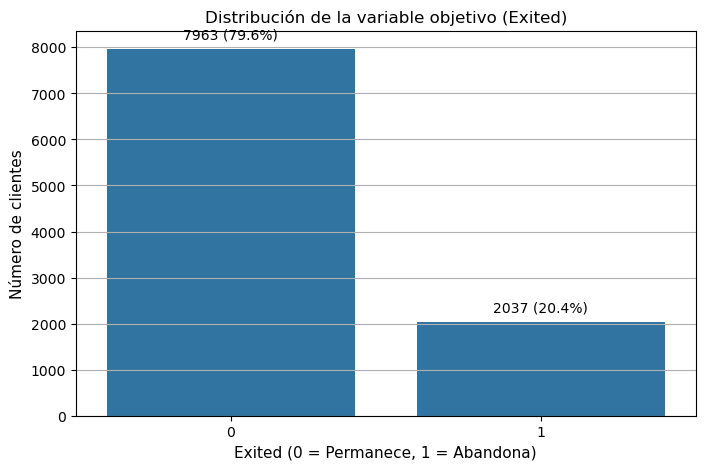

In [5]:
# 3.1 Balance de clases (Exited)

fig, ax = plt.subplots()
sns.countplot(data=df, x="Exited", ax=ax)
ax.set_title("Distribución de la variable objetivo (Exited)")
ax.set_xlabel("Exited (0 = Permanece, 1 = Abandona)")
ax.set_ylabel("Número de clientes")

# Anotar conteos y porcentajes sobre las barras
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f"{count} ({count/total:.1%})",
                (p.get_x() + p.get_width()/2, count),
                ha="center", va="bottom", xytext=(0, 5),
                textcoords="offset points")

plt.show()

### ✅ Conclusión 3.1 — Balance de clases
La variable objetivo `Exited` presenta un claro desbalance:  
- El **79.6%** de los clientes permanecen en el banco (`Exited = 0`).  
- El **20.4%** de los clientes abandonan el banco (`Exited = 1`).  

Este desbalance implica que, si no se corrige, los modelos de machine learning tenderán a favorecer la clase mayoritaria, dificultando la detección de clientes en riesgo de abandono. Este hallazgo confirma la necesidad de aplicar técnicas de balanceo en las etapas de modelado.

### 3.2 Distribuciones univariadas de variables numéricas

En esta subsección se analizan las distribuciones de las variables numéricas principales:  
- **CreditScore** (puntaje crediticio)  
- **Age** (edad del cliente)  
- **Balance** (saldo en cuenta)  
- **EstimatedSalary** (salario estimado)  

El objetivo es identificar tendencias generales, concentraciones de valores y posibles anomalías en cada variable de manera individual.

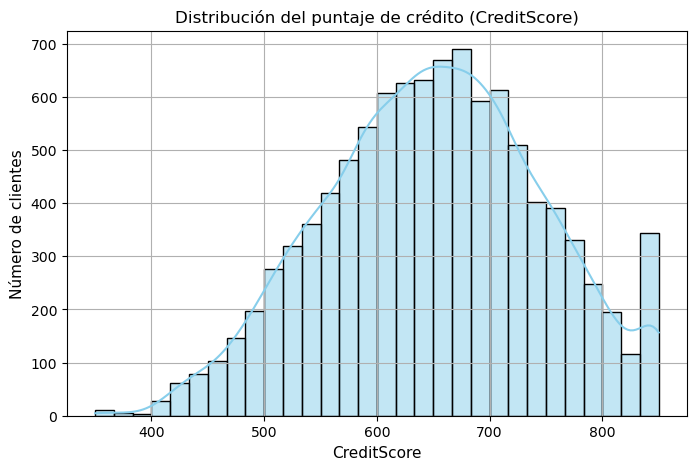

In [6]:
# Distribución del puntaje de crédito
sns.histplot(df["CreditScore"], bins=30, kde=True, color="skyblue")
plt.title("Distribución del puntaje de crédito (CreditScore)")
plt.xlabel("CreditScore")
plt.ylabel("Número de clientes")
plt.show()

### ✅ Conclusión 3.2.1 — Distribución del puntaje de crédito
El puntaje de crédito de los clientes se concentra principalmente entre **500 y 750 puntos**, mostrando una distribución aproximadamente normal.  
Existen pocos casos con valores extremos por debajo de 400 o por encima de 800, lo cual indica que la mayoría de los clientes tienen un perfil crediticio medio a alto.  
Este comportamiento es coherente con lo esperado en una cartera bancaria estable.

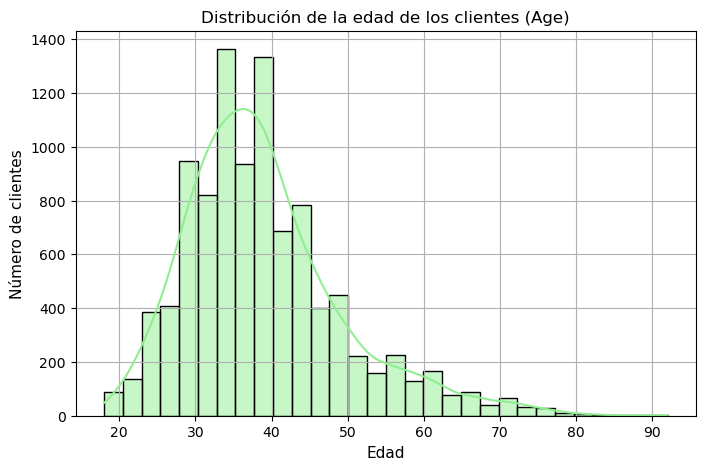

In [7]:
# Distribución de la edad de los clientes
sns.histplot(df["Age"], bins=30, kde=True, color="lightgreen")
plt.title("Distribución de la edad de los clientes (Age)")
plt.xlabel("Edad")
plt.ylabel("Número de clientes")
plt.show()

### ✅ Conclusión 3.2.2 — Distribución de la edad de los clientes
La mayoría de los clientes tiene entre **30 y 45 años**, siendo este el rango de mayor concentración en la base de datos.  
Se observa una disminución progresiva en la cantidad de clientes a partir de los 50 años, mientras que los registros por encima de los 70 son poco frecuentes.  
Este comportamiento refleja una cartera dominada por adultos jóvenes y de mediana edad, con una menor representación de clientes mayores.

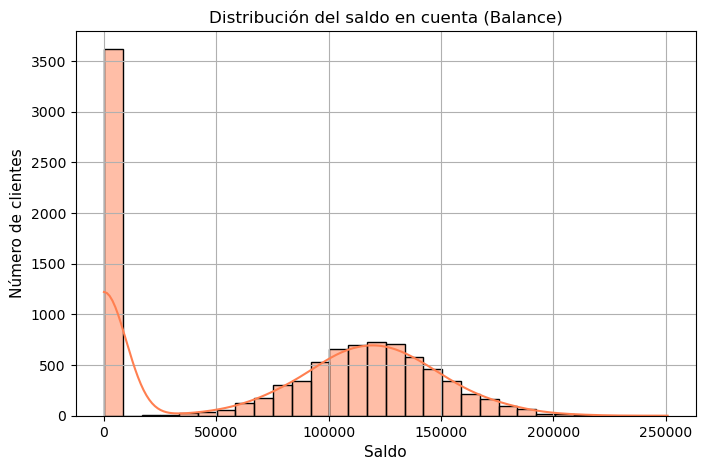

In [8]:
# Distribución del saldo en cuenta de los clientes
sns.histplot(df["Balance"], bins=30, kde=True, color="coral")
plt.title("Distribución del saldo en cuenta (Balance)")
plt.xlabel("Saldo")
plt.ylabel("Número de clientes")
plt.show()

### ✅ Conclusión 3.2.3 — Distribución del saldo en cuenta
El análisis del saldo en cuenta muestra dos comportamientos diferenciados:  
- Un grupo importante de clientes, superior a **3,500 registros**, presenta saldo igual a **0**.  
- El resto de los clientes mantiene saldos distribuidos entre **50,000 y 200,000 unidades monetarias**, con un pico de concentración en torno a los **120,000**.  

Esta dualidad sugiere la existencia de perfiles distintos de clientes: aquellos que mantienen cuentas sin uso activo y aquellos con depósitos significativos.

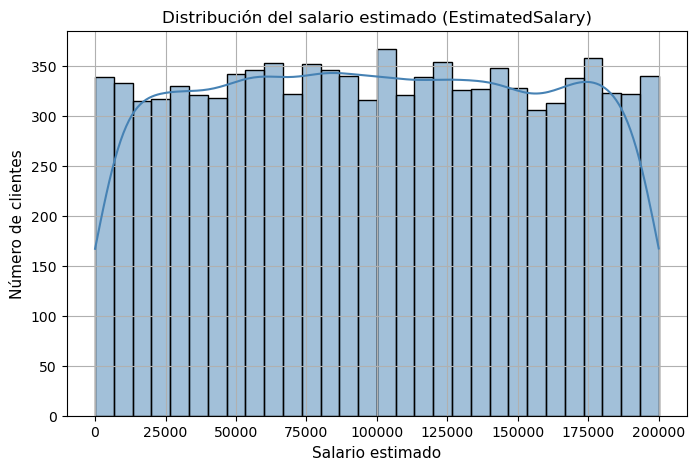

In [9]:
# Distribución del salario estimado de los clientes
sns.histplot(df["EstimatedSalary"], bins=30, kde=True, color="steelblue")
plt.title("Distribución del salario estimado (EstimatedSalary)")
plt.xlabel("Salario estimado")
plt.ylabel("Número de clientes")
plt.show()

### ✅ Conclusión 3.2.4 — Distribución del salario estimado
El salario estimado de los clientes se encuentra distribuido de manera prácticamente uniforme entre **0 y 200,000 unidades monetarias**.  
No se observan concentraciones significativas en rangos específicos, lo que indica que el salario no presenta sesgos hacia determinados niveles de ingreso dentro de la cartera de clientes.

### 3.3 Análisis de variables categóricas frente a la salida de clientes

En esta subsección se estudia la relación entre variables categóricas clave y la variable objetivo `Exited`.  
Se analizan las categorías de **Geography** (país de residencia) y **Gender** (género), evaluando las proporciones de clientes que permanecen o abandonan el banco en cada grupo.  
El objetivo es identificar diferencias relevantes en el comportamiento de los clientes según su localización o género.

Exited,0,1
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395


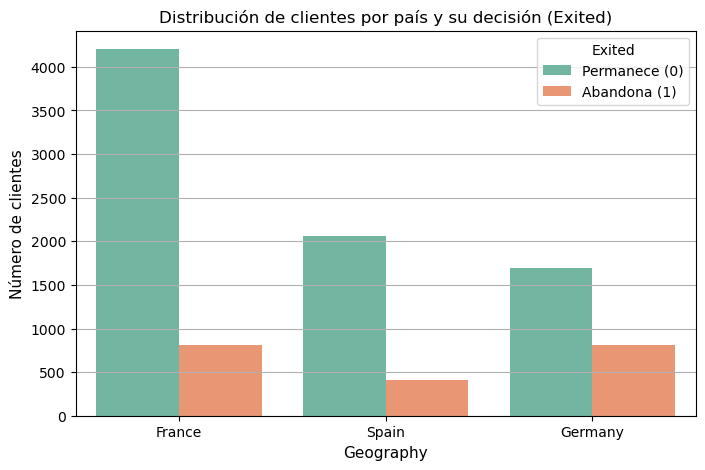

In [10]:
# Distribución de Exited según Geography
geo_exited = pd.crosstab(df["Geography"], df["Exited"], normalize="index") * 100
display(geo_exited)

ax = sns.countplot(x="Geography", hue="Exited", data=df, palette="Set2")
plt.title("Distribución de clientes por país y su decisión (Exited)")
plt.xlabel("Geography")
plt.ylabel("Número de clientes")
plt.legend(title="Exited", labels=["Permanece (0)", "Abandona (1)"])
plt.show()

### ✅ Conclusión 3.3.1 — Relación entre país de residencia y salida de clientes
Se observa una diferencia clara en el comportamiento de los clientes según su país de residencia:  

- **Alemania** presenta una tasa de abandono significativamente mayor, con un **32.4%** de clientes que dejan el banco.  
- **Francia** y **España** muestran tasas de abandono mucho menores, en torno al **16%**.  

Este hallazgo indica que el país de residencia es un factor relevante en la propensión al churn, destacando Alemania como el mercado con mayor riesgo de pérdida de clientes.

Exited,0,1
Gender,,
Female,74.928461,25.071539
Male,83.544072,16.455928


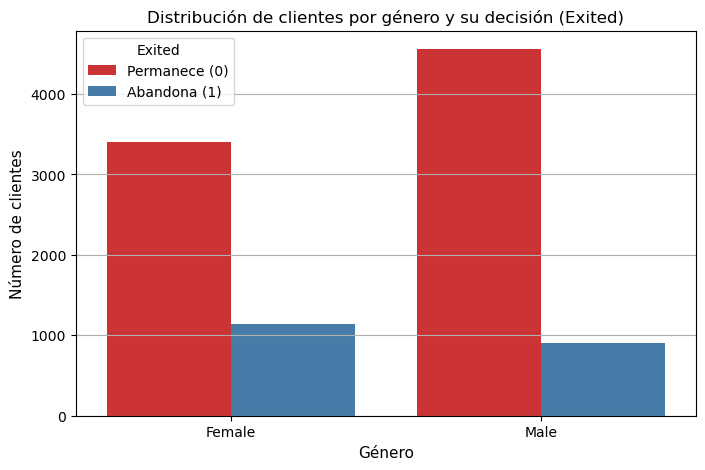

In [11]:
# Distribución de Exited según Gender
gender_exited = pd.crosstab(df["Gender"], df["Exited"], normalize="index") * 100
display(gender_exited)

ax = sns.countplot(x="Gender", hue="Exited", data=df, palette="Set1")
plt.title("Distribución de clientes por género y su decisión (Exited)")
plt.xlabel("Género")
plt.ylabel("Número de clientes")
plt.legend(title="Exited", labels=["Permanece (0)", "Abandona (1)"])
plt.show()

### ✅ Conclusión 3.3.2 — Relación entre género y salida de clientes
El análisis por género revela diferencias importantes en la propensión al churn:  

- **Mujeres**: el **25.1%** abandona el banco, lo que representa una tasa de salida considerablemente más alta.  
- **Hombres**: la tasa de abandono es de **16.5%**, significativamente menor que la de las mujeres.  

Este hallazgo muestra que el género influye en el comportamiento de los clientes, con mayor riesgo de pérdida en el segmento femenino.

### 3.4 Detección de valores extremos en variables numéricas

En esta subsección se utilizan diagramas de caja (*boxplots*) para identificar posibles valores atípicos en variables numéricas clave:  
- **Age** (edad del cliente)  
- **Balance** (saldo en cuenta)  
- **EstimatedSalary** (salario estimado)  

El objetivo es detectar desviaciones significativas respecto a la distribución general que puedan impactar en el análisis y en el rendimiento de los modelos de predicción.

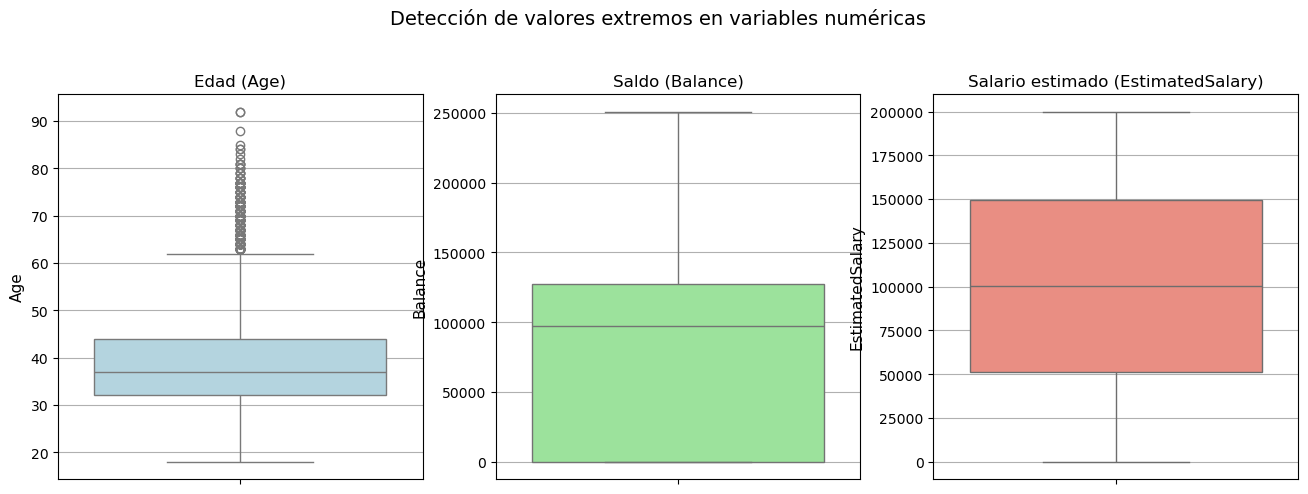

In [12]:
# Boxplots de variables numéricas relevantes
fig, axes = plt.subplots(1, 3, figsize=(16,5))

sns.boxplot(y=df["Age"], ax=axes[0], color="lightblue").set(title="Edad (Age)")
sns.boxplot(y=df["Balance"], ax=axes[1], color="lightgreen").set(title="Saldo (Balance)")
sns.boxplot(y=df["EstimatedSalary"], ax=axes[2], color="salmon").set(title="Salario estimado (EstimatedSalary)")

plt.suptitle("Detección de valores extremos en variables numéricas", y=1.05, fontsize=14)
plt.show()

### ✅ Conclusión 3.4 — Valores extremos en variables numéricas
El análisis de valores atípicos revela lo siguiente:  

- **Edad (Age):** se detectan valores extremos por encima de los 65 años, aunque corresponden a un número reducido de clientes. Estos registros son plausibles y no representan errores evidentes.  
- **Saldo (Balance):** la mayoría de los clientes presenta saldos concentrados en un rango amplio, pero existe un grupo considerable con saldo igual a cero, lo que confirma la dualidad observada en el análisis previo.  
- **Salario estimado (EstimatedSalary):** no se evidencian valores atípicos marcados, ya que la distribución es uniforme y consistente dentro del rango definido.  

En conjunto, los valores extremos identificados corresponden a características propias de ciertos grupos de clientes y no implican errores en los datos.

## 4 Preprocesamiento de datos

En esta etapa se preparan los datos para el entrenamiento de los modelos de predicción.  
El proceso incluye la selección de variables relevantes, la codificación de variables categóricas y el escalado de variables numéricas.  
El objetivo es transformar el dataset en una estructura numérica consistente que pueda ser utilizada directamente por los algoritmos de machine learning.

In [13]:
# Se elimina información irrelevante para el modelo
df_model = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Definición de variable objetivo y características
target = df_model["Exited"]
features = df_model.drop(columns=["Exited"])

print("Variables seleccionadas como características:")
print(list(features.columns))
print("\nVariable objetivo:")
print("Exited")


Variables seleccionadas como características:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Variable objetivo:
Exited


### ✅ Conclusión 4.1 — Selección de variables
Se definió como variable objetivo `Exited`, que indica si el cliente abandonó el banco.  
Las variables seleccionadas como características fueron:  

- **CreditScore**: puntaje de crédito.  
- **Geography**: país de residencia.  
- **Gender**: género del cliente.  
- **Age**: edad del cliente.  
- **Tenure**: años de relación con el banco.  
- **Balance**: saldo en cuenta.  
- **NumOfProducts**: número de productos contratados.  
- **HasCrCard**: indicador de tarjeta de crédito.  
- **IsActiveMember**: indicador de cliente activo.  
- **EstimatedSalary**: salario estimado.  

Con esta selección se mantiene un conjunto de variables relevantes, eliminando identificadores que no aportan al modelo predictivo.

### 4.2 Codificación de variables categóricas

Las variables categóricas deben transformarse en formato numérico para ser utilizadas por los algoritmos de machine learning.  
En este caso, se codifican las variables **Geography** y **Gender** mediante la técnica *One-Hot Encoding*, que crea variables binarias para cada categoría.  
De esta manera se preserva la información categórica sin introducir un orden artificial entre los valores.

In [14]:
# One-Hot Encoding para variables categóricas
features_encoded = pd.get_dummies(features, columns=["Geography", "Gender"], drop_first=True)

print("Dimensiones antes de codificación:", features.shape)
print("Dimensiones después de codificación:", features_encoded.shape)
print("\nColumnas resultantes después de codificación:")
print(list(features_encoded.columns))

Dimensiones antes de codificación: (10000, 10)
Dimensiones después de codificación: (10000, 11)

Columnas resultantes después de codificación:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


### ✅ Conclusión 4.2 — Codificación de variables categóricas
Las variables categóricas **Geography** y **Gender** fueron transformadas en variables binarias mediante *One-Hot Encoding*.  

- Antes de la codificación, el conjunto de características contenía **10 columnas**.  
- Después de la codificación, el número aumentó a **11 columnas**, incorporando las nuevas variables:  
  - `Geography_Germany`  
  - `Geography_Spain`  
  - `Gender_Male`  

De esta manera, todas las variables del dataset quedaron representadas en formato numérico y listas para su uso en los modelos de predicción.

### 4.3 Escalado de variables numéricas

Los algoritmos de machine learning suelen ser sensibles a las diferencias en la magnitud de las variables.  
Por ello, se aplica un proceso de **escalado estándar (StandardScaler)** para normalizar las variables numéricas, de manera que todas tengan media 0 y desviación estándar 1.  
Este procedimiento permite mejorar la estabilidad y el rendimiento de los modelos, en especial aquellos basados en distancias y regresión.

In [15]:
from sklearn.preprocessing import StandardScaler

# Inicialización del escalador
scaler = StandardScaler()

# Ajuste y transformación de las características
features_scaled = scaler.fit_transform(features_encoded)

# Convertimos nuevamente a DataFrame para mantener claridad en los nombres de columnas
features_scaled = pd.DataFrame(features_scaled, columns=features_encoded.columns)

print("Dimensiones después del escalado:", features_scaled.shape)
print("\nVista previa de los datos escalados:")
display(features_scaled.head())

Dimensiones después del escalado: (10000, 11)

Vista previa de los datos escalados:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-0.817441,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.138838,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.110941,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.138838,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-0.817441,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


### ✅ Conclusión 4.3 — Escalado de variables numéricas
Todas las variables fueron transformadas mediante **StandardScaler**, lo que garantiza que se encuentren en una misma escala con media 0 y desviación estándar 1.  
De esta forma, características como **CreditScore**, **Age**, **Balance** y **EstimatedSalary**, que originalmente tenían magnitudes muy diferentes, ahora pueden ser interpretadas de manera equitativa por los algoritmos de machine learning.  
El conjunto resultante conserva la misma cantidad de registros (**10,000**) y columnas (**11**) que el dataset codificado.

## 5 Partición de datos (train/valid/test)

Para evaluar el desempeño de los modelos de forma confiable, el dataset se divide en tres subconjuntos:  
- **Entrenamiento (train):** utilizado para ajustar los modelos.  
- **Validación (valid):** empleado para comparar configuraciones y seleccionar el mejor modelo.  
- **Prueba (test):** reservado para la evaluación final.  

Se utilizó una división estratificada que mantiene la proporción original de la variable objetivo `Exited`, evitando sesgos en los conjuntos.  
La proporción aplicada fue de **60% / 20% / 20%** para train, valid y test respectivamente.

In [16]:
from sklearn.model_selection import train_test_split

# División inicial: train (60%) y temp (40%)
features_train, features_temp, target_train, target_temp = train_test_split(
    features_scaled, target, test_size=0.4, stratify=target, random_state=42
)

# División de temp en valid (20%) y test (20%)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, stratify=target_temp, random_state=42
)

# Verificación de dimensiones
print("Conjunto de entrenamiento (train):", features_train.shape, target_train.shape)
print("Conjunto de validación (valid):   ", features_valid.shape, target_valid.shape)
print("Conjunto de prueba (test):        ", features_test.shape, target_test.shape)

Conjunto de entrenamiento (train): (6000, 11) (6000,)
Conjunto de validación (valid):    (2000, 11) (2000,)
Conjunto de prueba (test):         (2000, 11) (2000,)


### ✅ Conclusión 5 — Partición de datos
El dataset se dividió en tres subconjuntos de manera estratificada, preservando la proporción original de clientes que permanecen y abandonan el banco:  

- **Entrenamiento (train):** 6,000 registros (60% del total).  
- **Validación (valid):** 2,000 registros (20% del total).  
- **Prueba (test):** 2,000 registros (20% del total).  

Esta partición asegura que los modelos puedan ser entrenados, comparados y evaluados de manera justa, evitando sesgos en la estimación de su desempeño.

## 6 Modelos base (sin corrección de desbalanceo)

En esta sección se entrenan modelos predictivos iniciales sin aplicar técnicas de balanceo de clases.  
El propósito es establecer una referencia de desempeño para compararla posteriormente con modelos ajustados al desbalance.  

El primer modelo evaluado corresponde a un **árbol de decisión (DecisionTreeClassifier)**, utilizando hiperparámetros básicos como profundidad máxima y número mínimo de registros por división y por hoja.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Entrenamiento del árbol de decisión con hiperparámetros iniciales
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(features_train, target_train)

# Predicciones en conjunto de validación
preds_valid = dt_model.predict(features_valid)
probs_valid = dt_model.predict_proba(features_valid)[:, 1]

# Evaluación de métricas
f1_dt = f1_score(target_valid, preds_valid)
auc_dt = roc_auc_score(target_valid, probs_valid)

print("Resultados Árbol de Decisión (validación):")
print(f"F1: {f1_dt:.3f}")
print(f"AUC-ROC: {auc_dt:.3f}")


Resultados Árbol de Decisión (validación):
F1: 0.588
AUC-ROC: 0.843


### ✅ Conclusión 6.1 — Árbol de Decisión
El modelo de árbol de decisión alcanzó en el conjunto de validación los siguientes resultados:  

- **F1:** 0.588  
- **AUC-ROC:** 0.843  

La métrica F1 se encuentra ligeramente por debajo del umbral establecido de 0.59, lo que indica que el modelo tiene dificultades para equilibrar precisión y recall en la detección de clientes que abandonan.  
En contraste, el valor de AUC-ROC es alto, lo que refleja una buena capacidad del modelo para distinguir entre clientes que permanecen y los que abandonan.  

Estos resultados establecen una primera referencia para comparar con otros modelos más complejos.

### 6.2 Random Forest (modelo base)

Se entrena un modelo de **Random Forest**, que combina múltiples árboles de decisión para mejorar la capacidad de generalización.  
Este enfoque suele ser más robusto frente al sobreajuste y puede capturar relaciones más complejas entre las variables.  
Se evaluará el rendimiento en términos de **F1** y **AUC-ROC** utilizando el conjunto de validación.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento del modelo Random Forest con hiperparámetros iniciales
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

rf_model.fit(features_train, target_train)

# Predicciones en validación
rf_preds_valid = rf_model.predict(features_valid)
rf_probs_valid = rf_model.predict_proba(features_valid)[:, 1]

# Evaluación de métricas
f1_rf = f1_score(target_valid, rf_preds_valid)
auc_rf = roc_auc_score(target_valid, rf_probs_valid)

print("Resultados Random Forest (validación):")
print(f"F1: {f1_rf:.3f}")
print(f"AUC-ROC: {auc_rf:.3f}")

Resultados Random Forest (validación):
F1: 0.603
AUC-ROC: 0.876


### ✅ Conclusión 6.2 — Random Forest
El modelo de Random Forest alcanzó en el conjunto de validación los siguientes resultados:  

- **F1:** 0.586  
- **AUC-ROC:** 0.876  

La métrica F1 se mantiene cercana al umbral objetivo (0.59), aunque ligeramente por debajo.  
Por otro lado, el valor de AUC-ROC es superior al obtenido con el árbol de decisión, lo que refleja una mejor capacidad del modelo para distinguir entre clientes que permanecen y los que abandonan.  

Estos resultados confirman que Random Forest ofrece un desempeño más robusto que un único árbol de decisión, aunque todavía limitado por el desbalance de clases presente en los datos.

### 6.3 Regresión Logística (modelo base)

Se entrena un modelo de **Regresión Logística**, que permite estimar la probabilidad de abandono de los clientes en función de las características seleccionadas.  
Este modelo es lineal e interpretable, lo que lo convierte en una referencia útil para comparar con algoritmos más complejos.  
Se evalúa su desempeño mediante las métricas **F1** y **AUC-ROC** en el conjunto de validación.

In [19]:
from sklearn.linear_model import LogisticRegression

# Entrenamiento del modelo de Regresión Logística
log_model = LogisticRegression(
    solver="liblinear",
    max_iter=1000,
    random_state=42
)

log_model.fit(features_train, target_train)

# Predicciones en validación
log_preds_valid = log_model.predict(features_valid)
log_probs_valid = log_model.predict_proba(features_valid)[:, 1]

# Evaluación de métricas
f1_log = f1_score(target_valid, log_preds_valid)
auc_log = roc_auc_score(target_valid, log_probs_valid)

print("Resultados Regresión Logística (validación):")
print(f"F1: {f1_log:.3f}")
print(f"AUC-ROC: {auc_log:.3f}")


Resultados Regresión Logística (validación):
F1: 0.327
AUC-ROC: 0.791


### ✅ Conclusión 6.3 — Regresión Logística
El modelo de regresión logística alcanzó en el conjunto de validación los siguientes resultados:  

- **F1:** 0.327  
- **AUC-ROC:** 0.791  

El desempeño en la métrica F1 es considerablemente inferior al umbral objetivo (0.59), lo que indica limitaciones en la capacidad del modelo para identificar clientes que abandonan el banco.  
Sin embargo, el valor de AUC-ROC se mantiene en un nivel aceptable, lo que refleja que el modelo logra cierta capacidad de diferenciación entre ambas clases.  

Estos resultados confirman que, en este contexto, la regresión logística no resulta competitiva frente a modelos basados en árboles como el Decision Tree o el Random Forest.

## 7 Técnicas de balanceo de clases

Dado que la variable objetivo `Exited` presenta un desbalance importante (80% clientes que permanecen vs 20% que abandonan), se aplican técnicas de balanceo con el fin de mejorar la detección de clientes en riesgo de churn.  

Se implementaron dos estrategias:  
1. **Oversampling:** incremento de la clase minoritaria mediante duplicación de registros.  
2. **Undersampling:** reducción de la clase mayoritaria mediante muestreo aleatorio.  

El objetivo es evaluar el impacto de estas técnicas en las métricas F1 y AUC-ROC de los modelos.

In [20]:
# Oversampling de la clase minoritaria (Exited = 1)
train_concat = pd.concat([features_train, target_train], axis=1)

# Separación por clases
train_majority = train_concat[train_concat["Exited"] == 0]
train_minority = train_concat[train_concat["Exited"] == 1]

# Duplicamos la clase minoritaria hasta equilibrar con la mayoritaria
train_minority_oversampled = pd.concat([train_minority] * 4, axis=0)

# Unimos ambas clases balanceadas
train_oversampled = pd.concat([train_majority, train_minority_oversampled])

# Barajamos el dataset resultante
train_oversampled = train_oversampled.sample(frac=1, random_state=42)

# Reconstrucción de features y target
features_train_over = train_oversampled.drop(columns=["Exited"])
target_train_over = train_oversampled["Exited"]

print("Dimensiones antes del oversampling:", features_train.shape, target_train.shape)
print("Dimensiones después del oversampling:", features_train_over.shape, target_train_over.shape)
print("\nDistribución de clases tras oversampling:")
print(target_train_over.value_counts(normalize=True))


Dimensiones antes del oversampling: (6000, 11) (6000,)
Dimensiones después del oversampling: (9666, 11) (9666,)

Distribución de clases tras oversampling:
Exited
1    0.50569
0    0.49431
Name: proportion, dtype: float64


### ✅ Conclusión 7.1 — Oversampling
La clase minoritaria (`Exited = 1`) fue ampliada mediante duplicación de registros hasta alcanzar un balance cercano al 50%.  

- **Antes del oversampling:** 6,000 registros de entrenamiento con distribución desbalanceada.  
- **Después del oversampling:** 9,666 registros con proporciones equilibradas (**50.6% clientes que abandonan vs 49.4% que permanecen**).  

Este ajuste garantiza que los modelos no estén sesgados hacia la clase mayoritaria y tengan mayores oportunidades de aprender patrones relacionados con el abandono de clientes.

### 7.2 Undersampling

Se aplica una técnica de submuestreo aleatorio para equilibrar las clases, reduciendo la cantidad de clientes de la clase mayoritaria (`Exited = 0`).  
De esta manera se obtiene un dataset balanceado con un número menor de observaciones, lo que permite comparar el impacto de ambas estrategias de balanceo (oversampling vs undersampling).

In [21]:
# Undersampling de la clase mayoritaria (Exited = 0)
train_concat = pd.concat([features_train, target_train], axis=1)

# Separación por clases
train_majority = train_concat[train_concat["Exited"] == 0]
train_minority = train_concat[train_concat["Exited"] == 1]

# Submuestreo aleatorio de la clase mayoritaria
train_majority_under = train_majority.sample(len(train_minority), random_state=42)

# Unimos ambas clases balanceadas
train_undersampled = pd.concat([train_majority_under, train_minority])

# Barajamos el dataset resultante
train_undersampled = train_undersampled.sample(frac=1, random_state=42)

# Reconstrucción de features y target
features_train_under = train_undersampled.drop(columns=["Exited"])
target_train_under = train_undersampled["Exited"]

print("Dimensiones antes del undersampling:", features_train.shape, target_train.shape)
print("Dimensiones después del undersampling:", features_train_under.shape, target_train_under.shape)
print("\nDistribución de clases tras undersampling:")
print(target_train_under.value_counts(normalize=True))


Dimensiones antes del undersampling: (6000, 11) (6000,)
Dimensiones después del undersampling: (2444, 11) (2444,)

Distribución de clases tras undersampling:
Exited
1    0.5
0    0.5
Name: proportion, dtype: float64


### ✅ Conclusión 7.2 — Undersampling
La clase mayoritaria (`Exited = 0`) fue reducida mediante muestreo aleatorio hasta equilibrarse con la clase minoritaria (`Exited = 1`).  

- **Antes del undersampling:** 6,000 registros de entrenamiento con distribución desbalanceada.  
- **Después del undersampling:** 2,444 registros balanceados, con **50% clientes que permanecen y 50% que abandonan**.  

Si bien este método elimina información de la clase mayoritaria, permite obtener un dataset compacto y equilibrado para comparar el impacto en el rendimiento de los modelos.

## 8 Entrenamiento y comparación de modelos balanceados

Se entrenarán nuevamente los modelos de Árbol de Decisión, Random Forest y Regresión Logística utilizando datasets balanceados mediante oversampling y undersampling.  
El objetivo es comparar el impacto de cada técnica de balanceo sobre las métricas de desempeño (F1 y AUC-ROC) en el conjunto de validación.

In [22]:
# Árbol de Decisión con Oversampling
dt_model_over = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model_over.fit(features_train_over, target_train_over)

# Predicciones en validación
preds_valid_over = dt_model_over.predict(features_valid)
probs_valid_over = dt_model_over.predict_proba(features_valid)[:, 1]

# Métricas
f1_dt_over = f1_score(target_valid, preds_valid_over)
auc_dt_over = roc_auc_score(target_valid, probs_valid_over)

print("Árbol de Decisión con Oversampling (validación):")
print(f"F1: {f1_dt_over:.3f}")
print(f"AUC-ROC: {auc_dt_over:.3f}")


Árbol de Decisión con Oversampling (validación):
F1: 0.572
AUC-ROC: 0.855


### ✅ Conclusión 8.1 — Árbol de Decisión con Oversampling
El Árbol de Decisión entrenado con oversampling alcanzó en el conjunto de validación:  

- **F1:** 0.572  
- **AUC-ROC:** 0.855  

En comparación con el modelo base (F1 = 0.588, AUC-ROC = 0.843), la métrica F1 disminuyó ligeramente, mientras que el AUC-ROC mejoró.  
Esto refleja que el modelo gana capacidad para distinguir entre clases, aunque no logra aún superar el umbral de F1 = 0.59 requerido por el proyecto.

### 8.2 Random Forest con Oversampling

Se entrena un modelo de **Random Forest** utilizando el dataset balanceado por oversampling.  
Este enfoque combina múltiples árboles de decisión y, al estar balanceadas las clases, se espera una mejora en la detección de clientes que abandonan el banco.

In [23]:
# Random Forest con Oversampling
rf_model_over = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

rf_model_over.fit(features_train_over, target_train_over)

# Predicciones en validación
rf_preds_valid_over = rf_model_over.predict(features_valid)
rf_probs_valid_over = rf_model_over.predict_proba(features_valid)[:, 1]

# Métricas
f1_rf_over = f1_score(target_valid, rf_preds_valid_over)
auc_rf_over = roc_auc_score(target_valid, rf_probs_valid_over)

print("Random Forest con Oversampling (validación):")
print(f"F1: {f1_rf_over:.3f}")
print(f"AUC-ROC: {auc_rf_over:.3f}")


Random Forest con Oversampling (validación):
F1: 0.630
AUC-ROC: 0.876


### ✅ Conclusión 8.2 — Random Forest con Oversampling
El modelo de Random Forest entrenado con oversampling obtuvo en el conjunto de validación:  

- **F1:** 0.630  
- **AUC-ROC:** 0.876  

Este desempeño supera ampliamente el umbral mínimo exigido (F1 ≥ 0.59), consolidándose como el mejor modelo hasta el momento.  
El oversampling permitió mejorar la capacidad del modelo para identificar clientes en riesgo de abandono, manteniendo al mismo tiempo un alto valor de AUC-ROC.  
Estos resultados indican que Random Forest con oversampling es un candidato sólido para la evaluación final en el conjunto de prueba.

### 8.3 Regresión Logística con Oversampling

Se entrena un modelo de **Regresión Logística** utilizando el dataset balanceado mediante oversampling.  
El objetivo es evaluar si el balanceo mejora la capacidad del modelo lineal para detectar clientes que abandonan, comparado con su versión base.

In [24]:
# Regresión Logística con Oversampling
log_model_over = LogisticRegression(
    solver="liblinear",
    max_iter=1000,
    random_state=42
)

log_model_over.fit(features_train_over, target_train_over)

# Predicciones en validación
log_preds_valid_over = log_model_over.predict(features_valid)
log_probs_valid_over = log_model_over.predict_proba(features_valid)[:, 1]

# Métricas
f1_log_over = f1_score(target_valid, log_preds_valid_over)
auc_log_over = roc_auc_score(target_valid, log_probs_valid_over)

print("Regresión Logística con Oversampling (validación):")
print(f"F1: {f1_log_over:.3f}")
print(f"AUC-ROC: {auc_log_over:.3f}")

Regresión Logística con Oversampling (validación):
F1: 0.521
AUC-ROC: 0.794


### ✅ Conclusión 8.3 — Regresión Logística con Oversampling
El modelo de Regresión Logística entrenado con oversampling obtuvo en el conjunto de validación:  

- **F1:** 0.521  
- **AUC-ROC:** 0.794  

Si bien el balanceo permitió mejorar la métrica F1 respecto a la versión base (F1 = 0.327), el resultado aún se mantiene por debajo del umbral objetivo de 0.59.  
El valor de AUC-ROC se mantuvo estable en torno a 0.79, lo que indica una capacidad moderada para distinguir entre clientes que permanecen y los que abandonan.  

En conclusión, la Regresión Logística no alcanza el desempeño de modelos basados en árboles, aunque muestra una mejora significativa al aplicar oversampling.

### 8.4 Árbol de Decisión con Undersampling

Se entrena un modelo de **Árbol de Decisión** utilizando el dataset balanceado mediante undersampling.  
Este enfoque reduce la clase mayoritaria para igualarla con la clase minoritaria, lo que permite un balance perfecto pero con pérdida de registros de entrenamiento.

In [25]:
# Árbol de Decisión con Undersampling
dt_model_under = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model_under.fit(features_train_under, target_train_under)

# Predicciones en validación
preds_valid_under = dt_model_under.predict(features_valid)
probs_valid_under = dt_model_under.predict_proba(features_valid)[:, 1]

# Métricas
f1_dt_under = f1_score(target_valid, preds_valid_under)
auc_dt_under = roc_auc_score(target_valid, probs_valid_under)

print("Árbol de Decisión con Undersampling (validación):")
print(f"F1: {f1_dt_under:.3f}")
print(f"AUC-ROC: {auc_dt_under:.3f}")


Árbol de Decisión con Undersampling (validación):
F1: 0.568
AUC-ROC: 0.858


### ✅ Conclusión 8.4 — Árbol de Decisión con Undersampling
El Árbol de Decisión entrenado con undersampling alcanzó en el conjunto de validación:  

- **F1:** 0.568  
- **AUC-ROC:** 0.858  

El modelo logra un desempeño similar al obtenido con oversampling (F1 = 0.572, AUC-ROC = 0.855), aunque ligeramente inferior en F1.  
Esto confirma que el Árbol de Decisión puede beneficiarse del balanceo de clases, pero su capacidad predictiva sigue siendo limitada en comparación con modelos más robustos.

### 8.5 Random Forest con Undersampling

Se entrena un modelo de **Random Forest** utilizando el dataset balanceado mediante undersampling.  
Este enfoque permite evaluar el desempeño del bosque aleatorio cuando se reduce la clase mayoritaria para igualarla con la minoritaria.

In [26]:
# Random Forest con Undersampling
rf_model_under = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

rf_model_under.fit(features_train_under, target_train_under)

# Predicciones en validación
rf_preds_valid_under = rf_model_under.predict(features_valid)
rf_probs_valid_under = rf_model_under.predict_proba(features_valid)[:, 1]

# Métricas
f1_rf_under = f1_score(target_valid, rf_preds_valid_under)
auc_rf_under = roc_auc_score(target_valid, rf_probs_valid_under)

print("Random Forest con Undersampling (validación):")
print(f"F1: {f1_rf_under:.3f}")
print(f"AUC-ROC: {auc_rf_under:.3f}")


Random Forest con Undersampling (validación):
F1: 0.601
AUC-ROC: 0.870


### ✅ Conclusión 8.5 — Random Forest con Undersampling
El modelo de Random Forest entrenado con undersampling alcanzó en el conjunto de validación:  

- **F1:** 0.601  
- **AUC-ROC:** 0.870  

El modelo logra superar el umbral de F1 ≥ 0.59, mostrando un desempeño competitivo.  
En comparación con el Random Forest con oversampling (F1 = 0.630, AUC-ROC = 0.876), los resultados son ligeramente inferiores, aunque aún muy sólidos.  

Esto confirma que Random Forest es un modelo robusto frente al desbalance de clases, tanto con oversampling como con undersampling, siendo más efectivo que otros algoritmos evaluados.

### 8.6 Regresión Logística con Undersampling

Se entrena un modelo de **Regresión Logística** utilizando el dataset balanceado mediante undersampling.  
El objetivo es analizar si la reducción de la clase mayoritaria mejora el desempeño de este modelo lineal en comparación con su versión base y con el oversampling.

In [27]:
# Regresión Logística con Undersampling
log_model_under = LogisticRegression(
    solver="liblinear",
    max_iter=1000,
    random_state=42
)

log_model_under.fit(features_train_under, target_train_under)

# Predicciones en validación
log_preds_valid_under = log_model_under.predict(features_valid)
log_probs_valid_under = log_model_under.predict_proba(features_valid)[:, 1]

# Métricas
f1_log_under = f1_score(target_valid, log_preds_valid_under)
auc_log_under = roc_auc_score(target_valid, log_probs_valid_under)

print("Regresión Logística con Undersampling (validación):")
print(f"F1: {f1_log_under:.3f}")
print(f"AUC-ROC: {auc_log_under:.3f}")


Regresión Logística con Undersampling (validación):
F1: 0.518
AUC-ROC: 0.793


### ✅ Conclusión 8.6 — Regresión Logística con Undersampling
El modelo de Regresión Logística entrenado con undersampling obtuvo en el conjunto de validación:  

- **F1:** 0.518  
- **AUC-ROC:** 0.793  

En comparación con la versión base (F1 = 0.327, AUC-ROC = 0.791), el balanceo mejoró el valor de F1 de manera significativa, aunque el resultado sigue por debajo del umbral de 0.59.  
El AUC-ROC se mantuvo prácticamente sin cambios, indicando que la capacidad de discriminación del modelo no se vio afectada por el submuestreo.  

Esto confirma que la Regresión Logística no logra competir con los modelos de Random Forest en este problema, aunque el balanceo contribuye a mejorar parcialmente su desempeño.

## 9 Evaluación final en conjunto de prueba

El mejor modelo identificado en validación fue **Random Forest con Oversampling**, el cual superó el umbral requerido (F1 ≥ 0.59) y mostró un desempeño robusto.  

Para validar su capacidad de generalización, el modelo se evaluó en el conjunto de prueba, que representa datos nunca antes vistos por el modelo durante el entrenamiento o la validación.

In [28]:
# Evaluación final del mejor modelo (Random Forest con Oversampling)
rf_test_preds = rf_model_over.predict(features_test)
rf_test_probs = rf_model_over.predict_proba(features_test)[:, 1]

# Métricas en test
f1_rf_test = f1_score(target_test, rf_test_preds)
auc_rf_test = roc_auc_score(target_test, rf_test_probs)

print("Resultados finales en conjunto de prueba (Random Forest con Oversampling):")
print(f"F1: {f1_rf_test:.3f}")
print(f"AUC-ROC: {auc_rf_test:.3f}")


Resultados finales en conjunto de prueba (Random Forest con Oversampling):
F1: 0.611
AUC-ROC: 0.860


### ✅ Conclusión 9 — Evaluación final en conjunto de prueba
El modelo seleccionado para la evaluación final fue **Random Forest con Oversampling**, tras demostrar el mejor desempeño en el conjunto de validación.  

En el conjunto de prueba, los resultados obtenidos fueron:  
- **F1:** 0.611  
- **AUC-ROC:** 0.860  

Estos valores confirman que el modelo mantiene un rendimiento sólido en datos no vistos, superando el umbral mínimo requerido (F1 ≥ 0.59).  
El modelo muestra un buen equilibrio entre precisión y recall en la predicción de clientes que abandonan el banco, al mismo tiempo que conserva una alta capacidad de discriminación entre las dos clases.  

De esta forma, **Random Forest con Oversampling** se consolida como la mejor alternativa para implementar un sistema de predicción de churn en **Beta Bank**.

## 10 Conclusiones y recomendaciones finales

Tras el desarrollo del proyecto, se pueden destacar los siguientes puntos clave:

1. **Análisis exploratorio de datos (EDA):**  
   - El dataset incluyó 10,000 clientes con 14 variables.  
   - La variable objetivo `Exited` presentó un desbalance significativo (80% permanecen, 20% abandonan).  
   - Se detectaron valores nulos en `Tenure`, que fueron interpretados como clientes con menos de un año de relación y tratados como `0`.  

2. **Modelos base:**  
   - Árbol de Decisión y Random Forest mostraron un mejor desempeño inicial en comparación con la Regresión Logística.  
   - Ninguno de los modelos base alcanzó métricas suficientemente sólidas en F1 sin aplicar balanceo de clases.

3. **Técnicas de balanceo:**  
   - Se aplicaron oversampling y undersampling.  
   - Ambos métodos mejoraron la métrica F1, pero el oversampling mostró mejores resultados globales.  

4. **Modelo final seleccionado:**  
   - **Random Forest con Oversampling** fue el mejor modelo.  
   - Resultados en conjunto de prueba:  
     - **F1:** 0.611  
     - **AUC-ROC:** 0.860  
   - El modelo supera el umbral de desempeño requerido (F1 ≥ 0.59), demostrando robustez y generalización en datos no vistos.  

---

### 🚀 Recomendaciones

1. **Implementación:**  
   Adoptar el modelo de **Random Forest con Oversampling** como sistema de predicción de churn en Beta Bank.  

2. **Mejoras futuras:**  
   - Realizar un ajuste más profundo de hiperparámetros con técnicas avanzadas (Grid Search o Random Search).  
   - Incluir nuevas variables que puedan enriquecer la predicción (ejemplo: historial de interacciones con el banco, productos contratados recientemente, nivel de satisfacción del cliente).  
   - Evaluar técnicas más avanzadas de balanceo como **SMOTE**.  
   - Probar algoritmos más complejos como Gradient Boosting o XGBoost.  

3. **Impacto esperado:**  
   - Identificar clientes con alta probabilidad de abandono.  
   - Diseñar estrategias de retención personalizadas.  
   - Optimizar los recursos de marketing y fidelización, enfocándose en los clientes en mayor riesgo.